# Nikkei High Dividend Yield 50 Analysis with Portfolio Optimizer



## Initialization

If you are using CoLab, first install the dependency PyPortfolioOpt

In [ ]:
!pip install git+https://github.com/robertmartin8/PyPortfolioOpt.git

Then get our PortfolioOptimizer library and the necessary datasets from our repository

In [1]:
!wget https://github.com/cartasuzuki/phynance/blob/master/datasets/nikkei_high_dividend_yield_50_prices.csv
!wget https://raw.githubusercontent.com/cartasuzuki/phynance/master/datasets/nikkei_high_dividend_yield_50_weight_en.csv
!wget https://raw.githubusercontent.com/cartasuzuki/phynance/master/PortfolioOptimizer.py

--2019-02-09 16:41:21--  https://github.com/cartasuzuki/phynance/blob/master/datasets/nikkei_high_dividend_yield_50_prices.csv
Resolving github.com (github.com)... 192.30.255.112, 192.30.255.113
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘nikkei_high_dividend_yield_50_prices.csv.11’

nikkei_high_dividen     [    <=>             ]   1.37M  1.78MB/s    in 0.8s    

2019-02-09 16:41:24 (1.78 MB/s) - ‘nikkei_high_dividend_yield_50_prices.csv.11’ saved [1441041]

--2019-02-09 16:41:24--  https://raw.githubusercontent.com/cartasuzuki/phynance/master/datasets/nikkei_high_dividend_yield_50_weight_en.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.88.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.88.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3325 (3.2K) [text/plain]
Saving to: ‘ni

Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PortfolioOptimizer import PortfolioOptimizer

In [3]:
stock_symbols = pd.read_csv('nikkei_high_dividend_yield_50_weight_en.csv')

Once we have loaded our stock symbols dataset we can either use the prices in the csv file or download prices from alphadvantage to get updated data.

### Filter out some stocks from the index

Chose a minimum div/yield. Set to 0 if you want to use all stocks in the index

In [4]:
min_yield = 3.7

In [5]:
selected_stocks = stock_symbols[stock_symbols['Dividend']>min_yield]

Create a filter string (highDivString) to be used later to filter stocks with lower yield than min_yield

In [6]:
highDivString = selected_stocks['Code'].values.astype(int)
highDivString = highDivString.astype(str)
string = '.TOK'
highDivString = [x + string for x in highDivString]

### Method 1: use csv file

Read the stock prices from the csv provided in our repository

In [7]:
stocks = pd.read_csv('nikkei_high_dividend_yield_50_prices.csv', index_col= ['timestamp'], parse_dates= ['timestamp'])

If you want higher yield filter out using the filter previously created

In [8]:
stocks = stocks[highDivString]

### Method 2: Get prices from alphadvantage

Using the highDivString filter, download prices from alpadvantage

In [ ]:
stocks = PortfolioOptimizer.get_stock_prices(highDivString)  

## Remove some stocks to improve sectore coverage

In [10]:
droplist = ['8002.TOK']
stocks = stocks.drop(droplist, axis = 1)

## Portfolio Optimization

In [11]:
weights, sharpe, ret = PortfolioOptimizer.optimize_portfolio(stocks,0)

2768.TOK: 22.0%
8035.TOK: 28.000000000000004%
8053.TOK: 12.0%
8058.TOK: 19.0%
8628.TOK: 10.0%
9437.TOK: 8.0%
Sharpe: 0.45
Exp. Return: 11.54


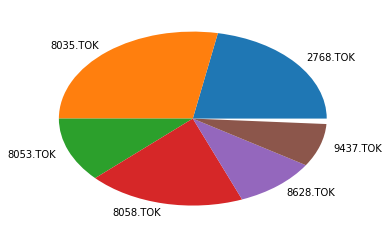

In [12]:
PortfolioOptimizer.print_portfolio_result(weights, sharpe, ret)
PortfolioOptimizer.portfolioAsPieChart(weights)

Average yield

In [ ]:
selected_stocks['Dividend'].mean()

Remove 0s and TOK string.

In [13]:
www ={x:y for x,y in weights.items() if y>0.001}
portfolio =list(www.keys())
portfoliovalues = list(www.values())
portfolio = [s.replace('.TOK','') for s in portfolio]

### Resulting Portfolio

In [14]:
selected_stocks = selected_stocks[selected_stocks['Code'].isin(portfolio)]
selected_stocks['Weight'] = portfoliovalues

In [15]:
selected_stocks

,Date of Data,Code,Company Name,Nikkei Industrial Classification,Weight,Dividend
1,2018/11/30,2768,SOJITZ CORP.,Trading Companies,0.22,3.87
30,2018/11/30,8035,TOKYO ELECTRON LTD.,Electric Machinery,0.28,4.03
31,2018/11/30,8053,SUMITOMO CORP.,Trading Companies,0.12,4.10
32,2018/11/30,8058,MITSUBISHI CORP.,Trading Companies,0.19,3.79
42,2018/11/30,8628,"MATSUI SECURITIES CO., LTD.",Securities,0.10,8.26
48,2018/11/30,9437,"NTT DOCOMO, INC.",Communications,0.08,3.90


In [16]:
 Div_Yield = np.average(selected_stocks['Dividend'], weights=selected_stocks['Weight'])
round(Div_Yield, 2)

4.37

In [17]:
weights

{'1928.TOK': 0.0,
 '2768.TOK': 0.22,
 '2914.TOK': 0.0,
 '4502.TOK': 0.0,
 '6178.TOK': 0.0,
 '6703.TOK': 0.0,
 '7201.TOK': 0.0,
 '7270.TOK': 0.0,
 '7751.TOK': 0.0,
 '8035.TOK': 0.28,
 '8053.TOK': 0.12,
 '8058.TOK': 0.19,
 '8304.TOK': 0.0,
 '8316.TOK': 0.0,
 '8411.TOK': 0.0,
 '8601.TOK': 0.0,
 '8604.TOK': 0.0,
 '8628.TOK': 0.1,
 '8725.TOK': 0.0,
 '9437.TOK': 0.08}